<p style=" background-color:#c49974;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b >🖊️ Pen Digits Showdown: SVM vs. Random Forest vs. XGBoost for Handwriting Recognition ✍️
</b></span></p>

## Notebook Overview

In this notebook, we tackle handwriting recognition using the Pen Digits Dataset. We preprocess the data, apply and compare four machine learning models: 
- **SVM**
- **Decision Tree (DT)**
- **Random Forest (RF)**
- **XGBoost**
and evaluate them using metrics like accuracy, F1-score (macro), and confusion matrix. Additionally, we analyze feature importances for tree-based models to identify the most relevant features for classification. This notebook provides a comparison of these models, showcasing their strengths and weaknesses in classifying handwritten digits..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [3]:
df1 = df.copy() 

# EDA

In [5]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
Types
int64    17
Name: count, dtype: int64
___________________________


Types  Counts  Uniques  Nulls  Min  Max
class    int64   10992       10      0    0    9
input1   int64   10992      101      0    0  100
input10  int64   10992      101      0    0  100
input11  int64   10992      101      0    0  100
input12  int64   10992      101      0    0  100
input13  int64   10992      101      0    0  100
input14  int64   10992      101      0    0  100
input15  int64   10992      101      0    0  100
input16  int64   10992      101      0    0  100
input2   int64   10992       96      0    0  100
input3   int64   10992      101      0    0  100
input4   int64   10992       98      0    0  100
input5   int64   10992      101      0    0  100
input6   int64   10992      101      0    0  100
input7   int64   10992      101      0    0  100
input8   int64   10992      101      0    0  100
input9   int64   10992      101      0    0  100

In [6]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

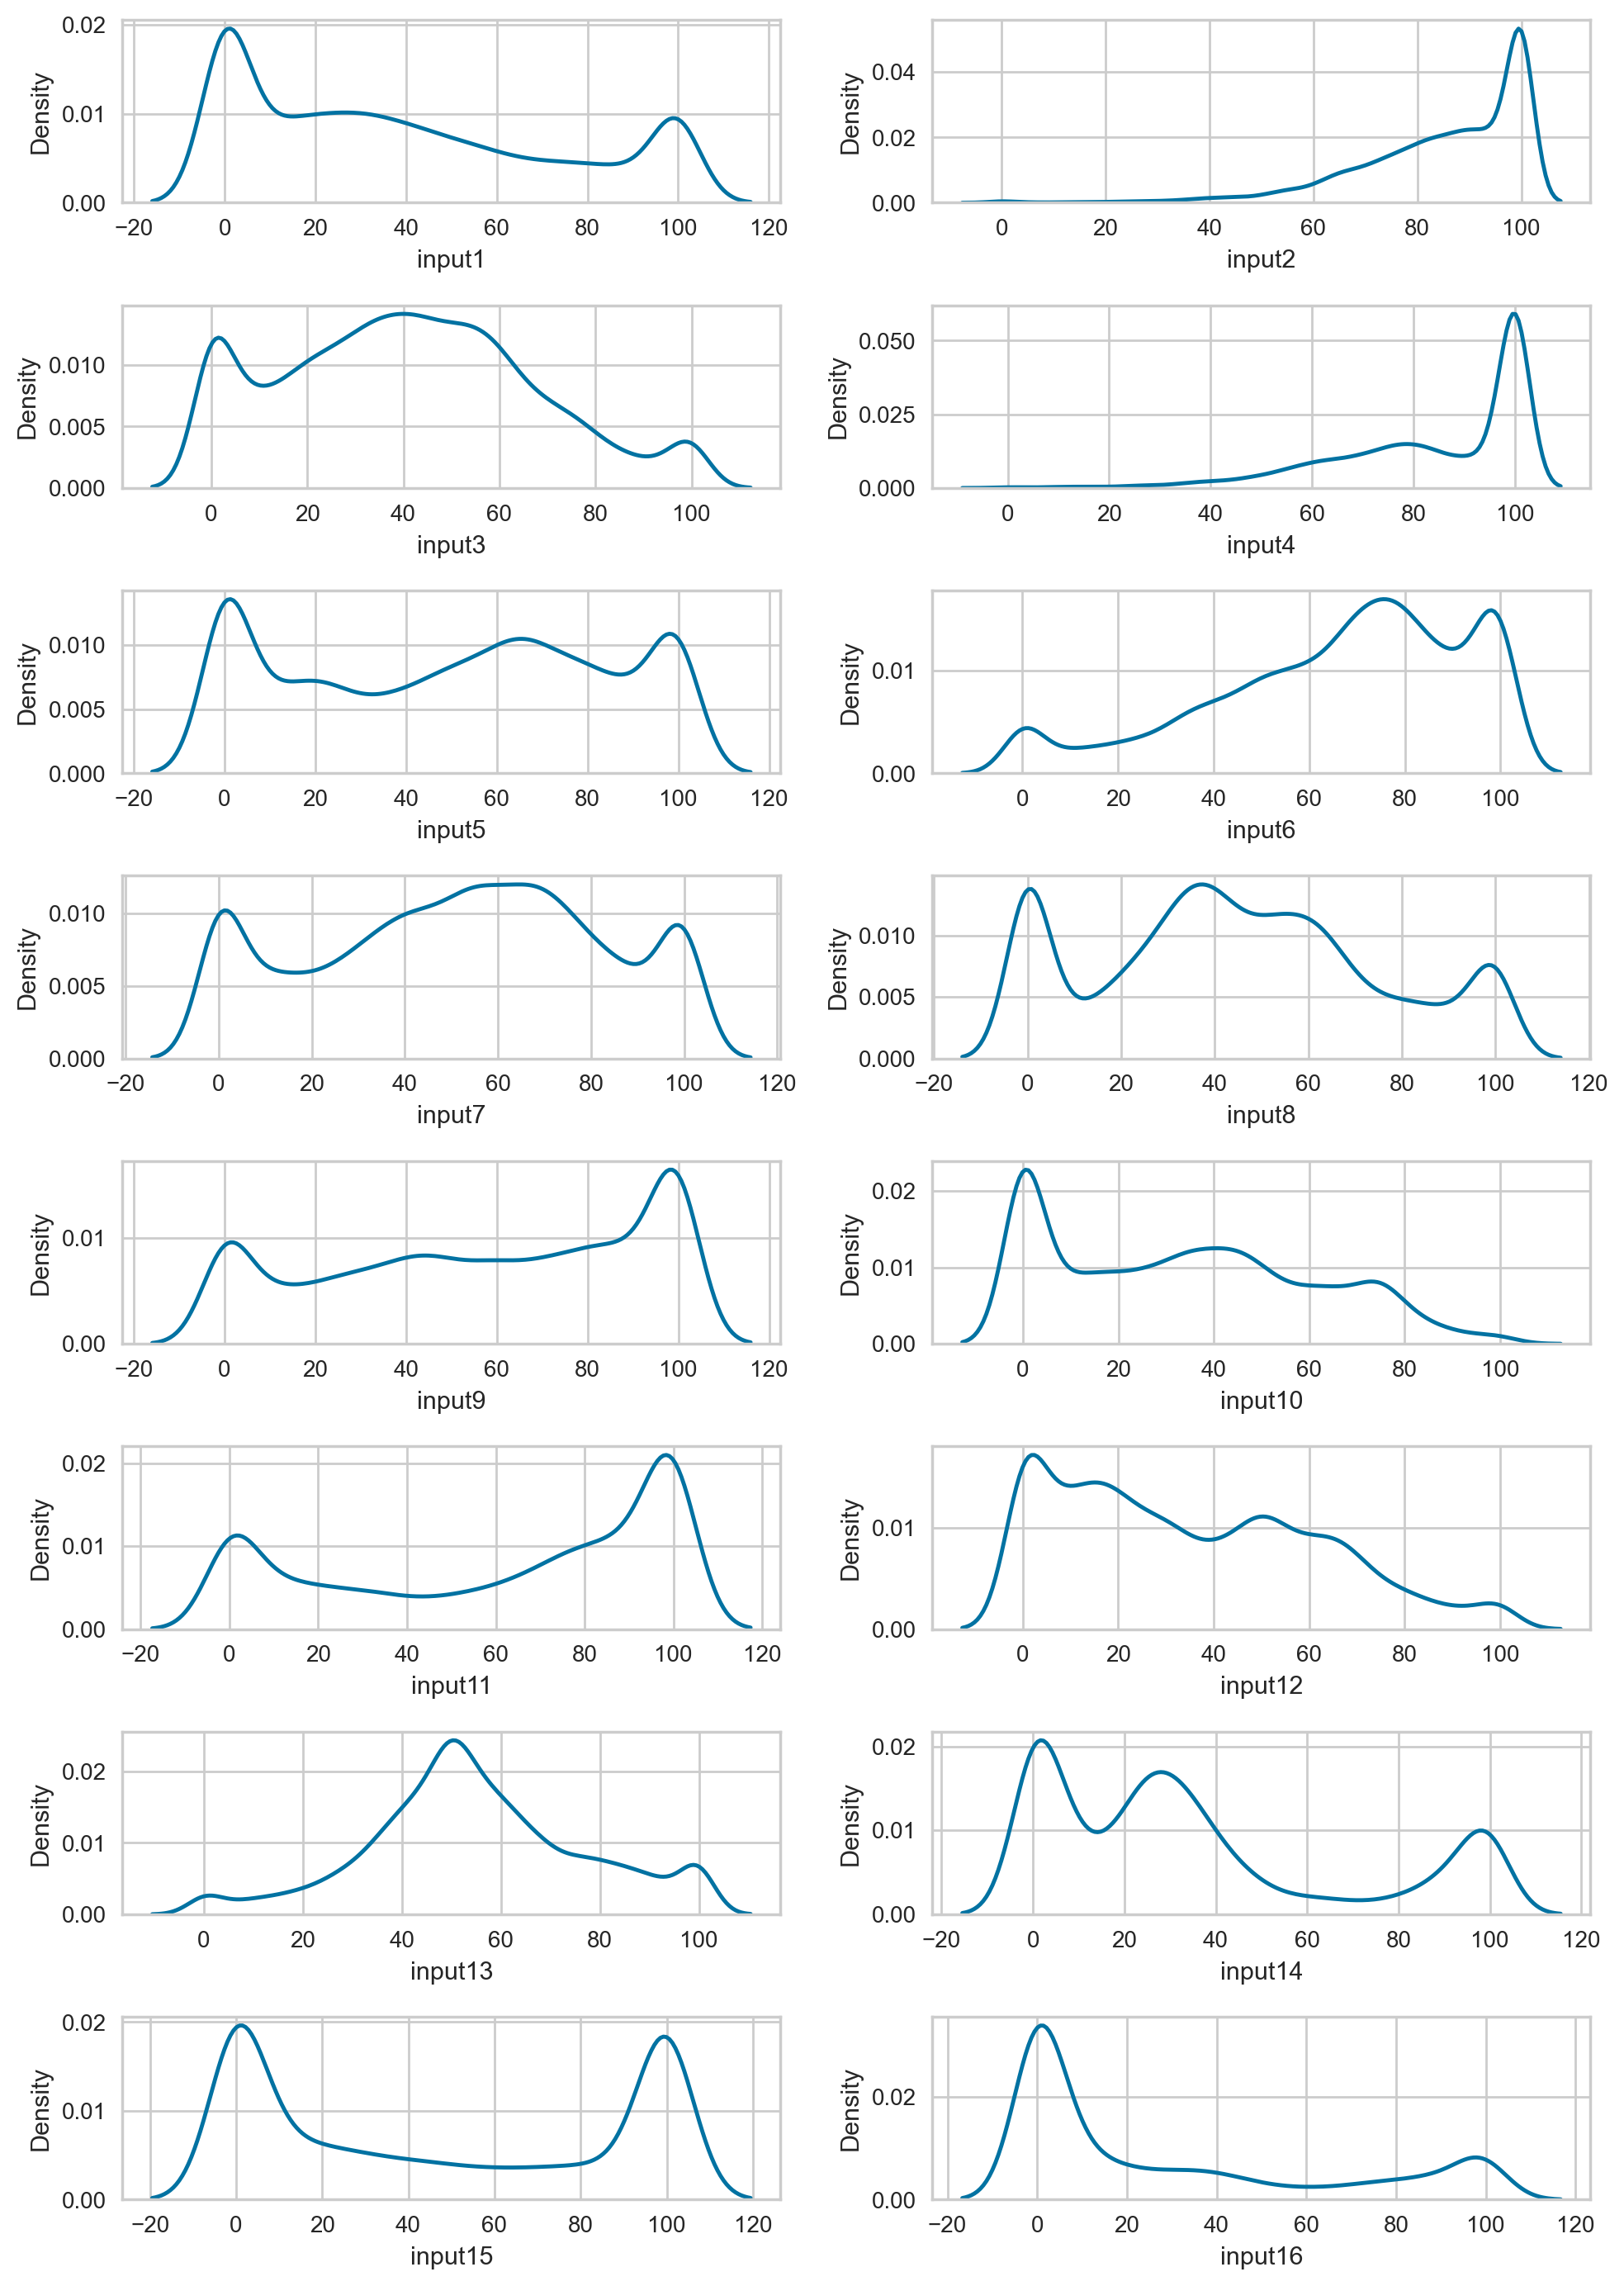

In [7]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

In [8]:
df.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

## Outliers

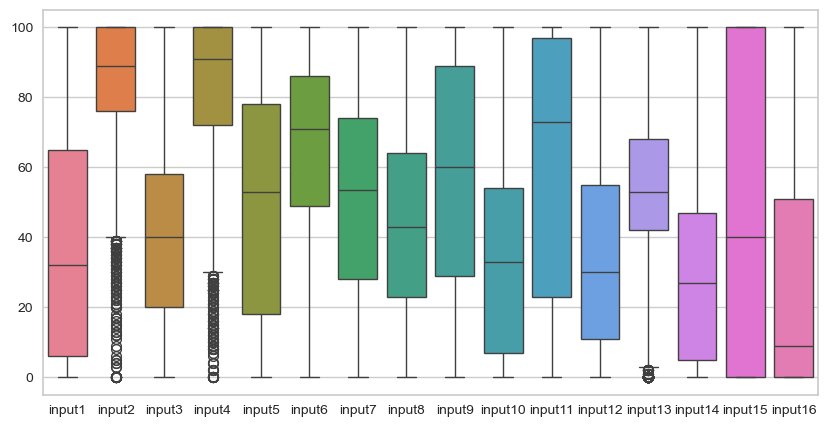

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

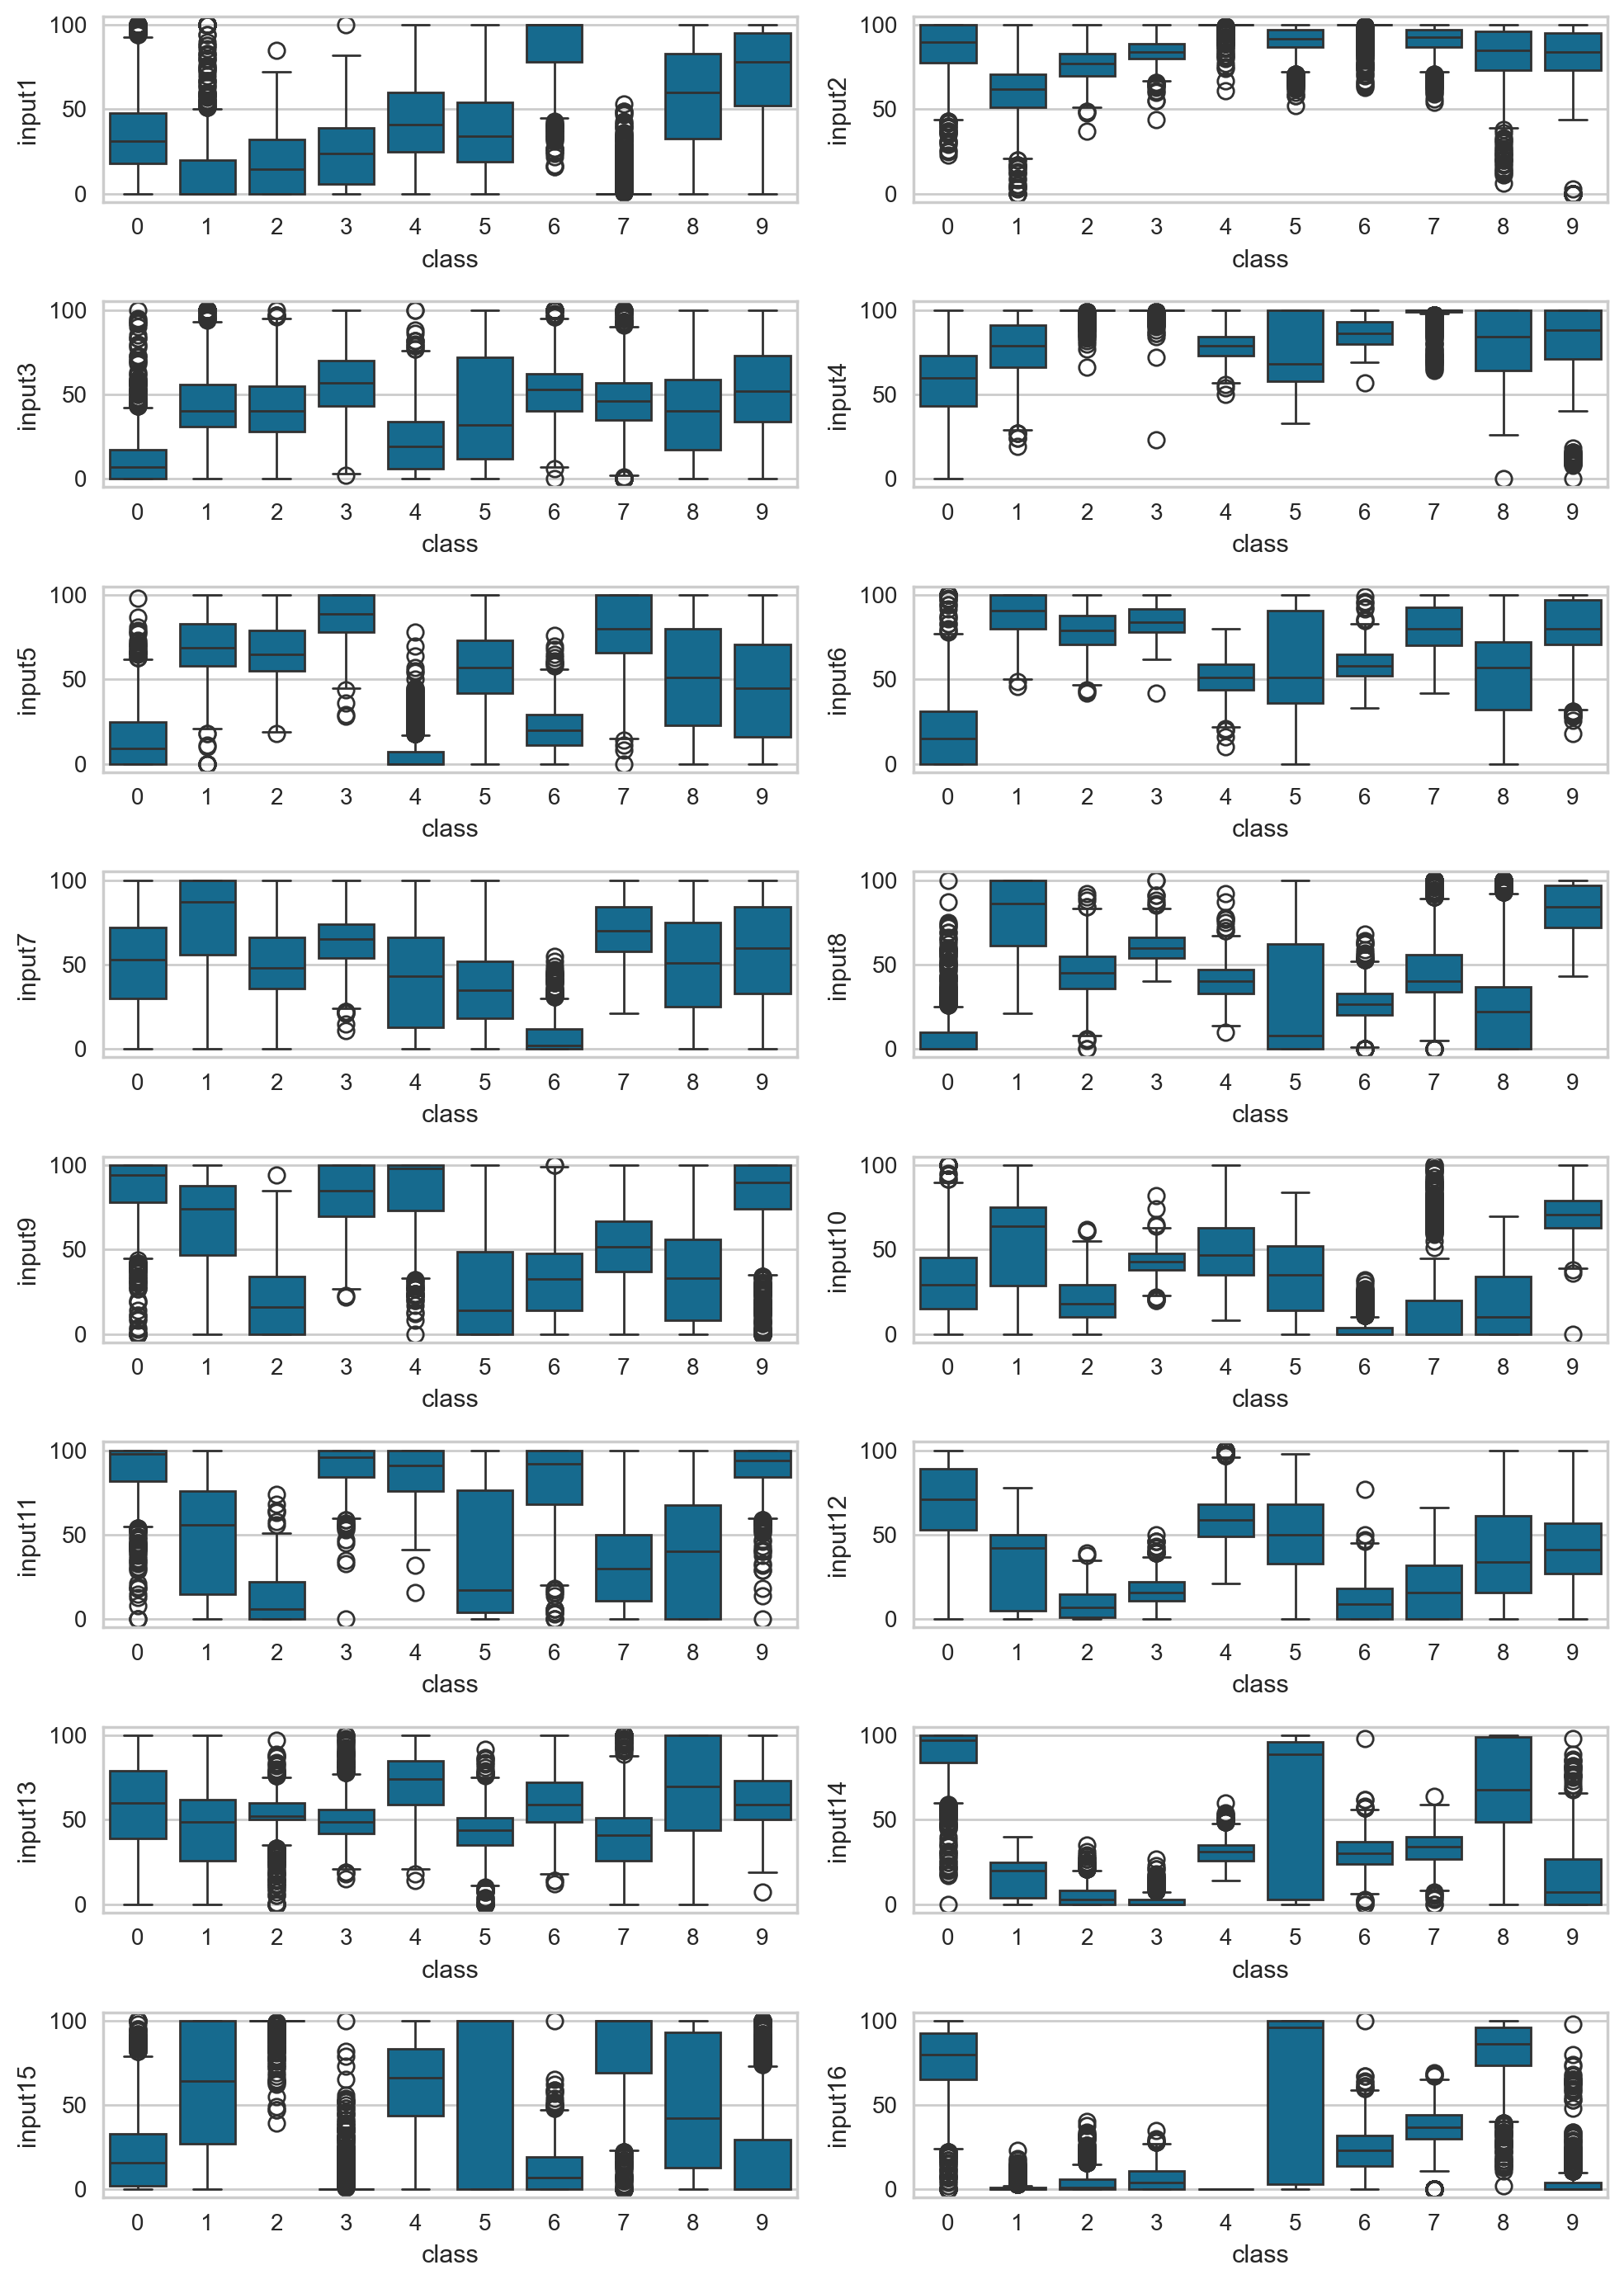

In [10]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [11]:
def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [12]:
threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)      

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

In [13]:
for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

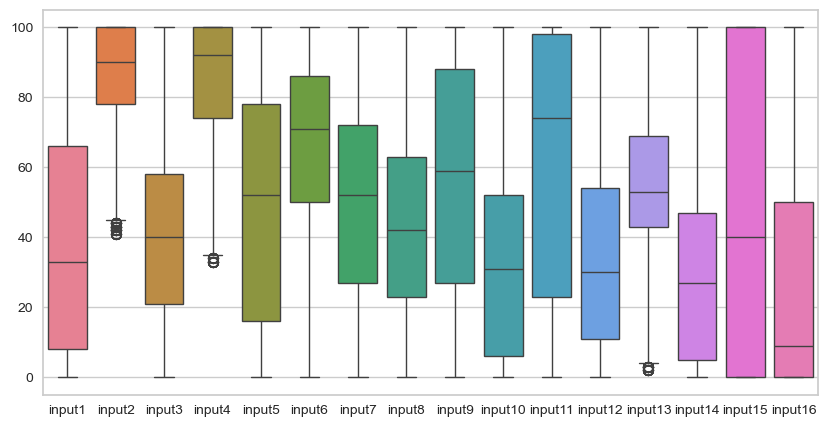

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1));

In [15]:
for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


In [16]:
class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

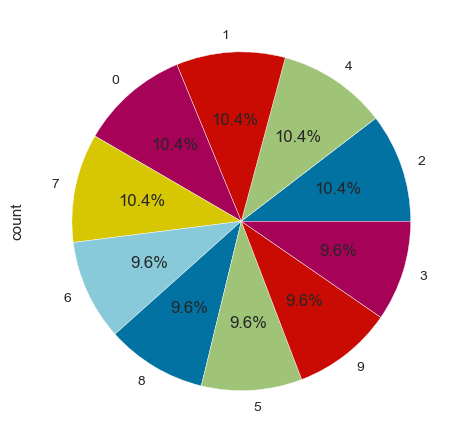

In [17]:
df["class"].value_counts().plot.pie(autopct='%1.1f%%');

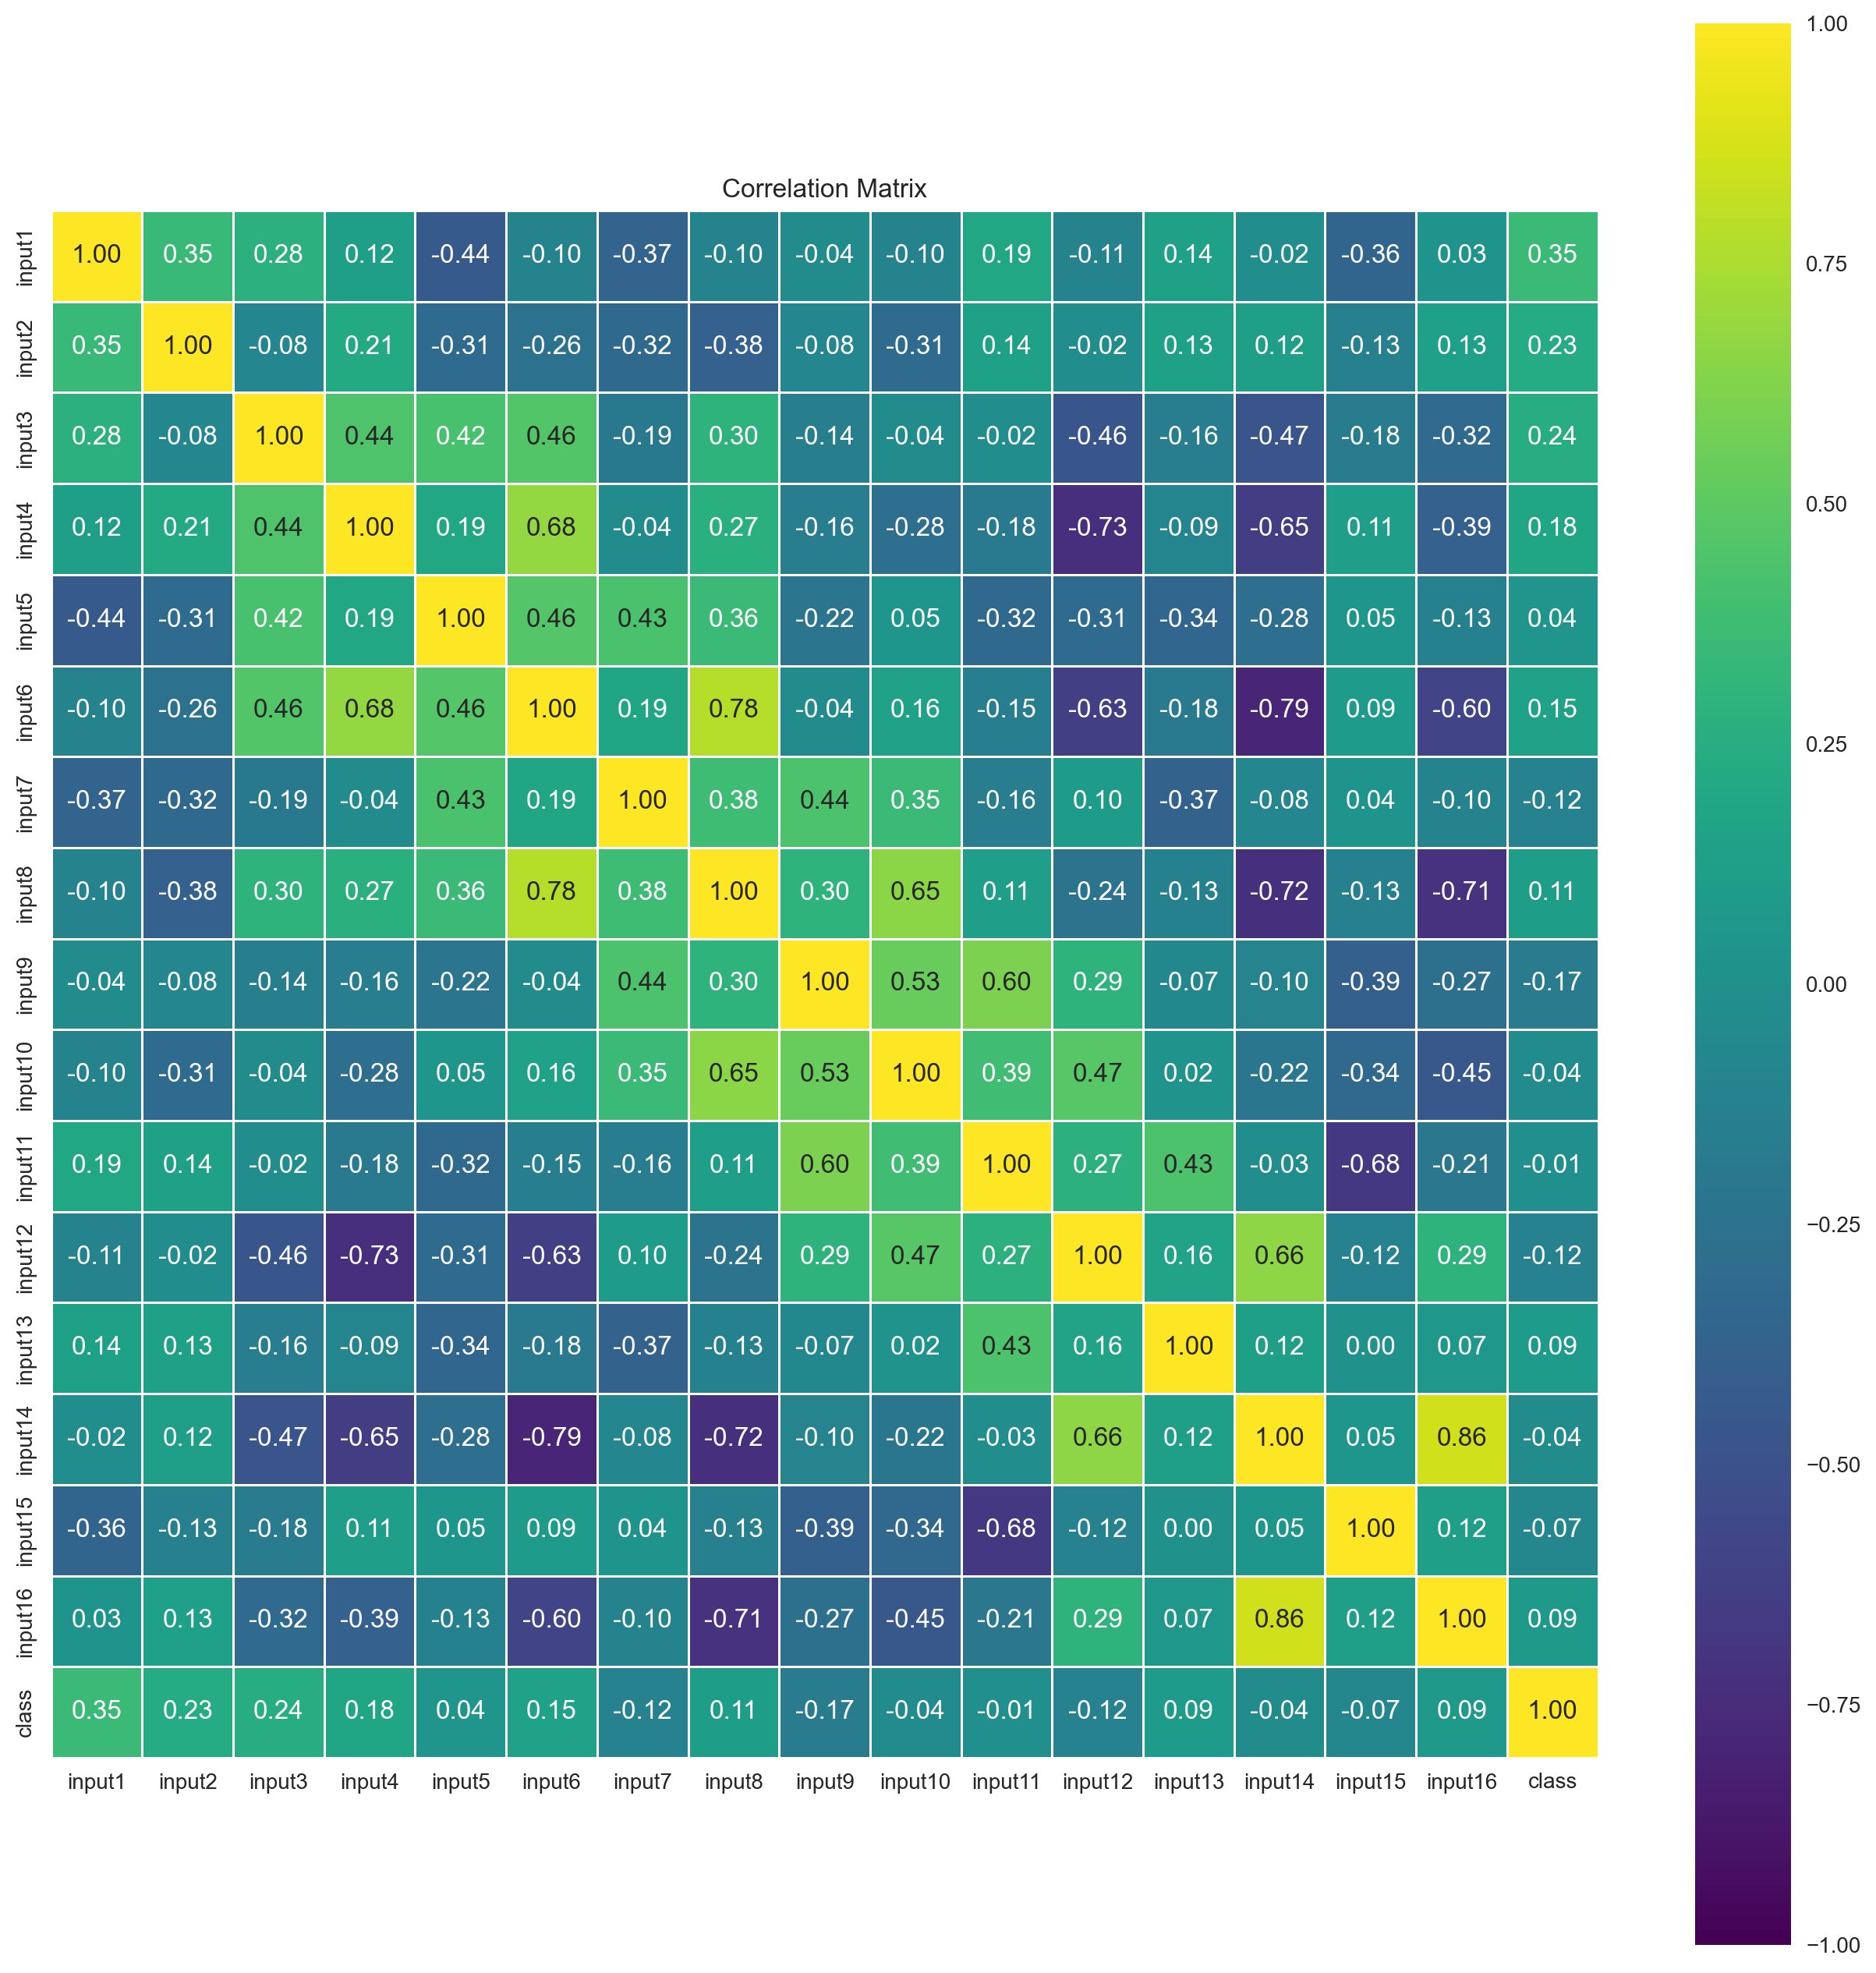

In [18]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

# Data Preprocessing

In [20]:
X = df.drop("class", axis = 1)
y = df["class"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# SVM

In [23]:
scaler = MinMaxScaler()  

In [24]:
SVM_model =  SVC(kernel="rbf", random_state=101)

In [25]:
from sklearn.pipeline  import Pipeline

SVM_model = Pipeline([("scaler",scaler),("SVM",SVM_model)])

In [26]:
SVM_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC(random_state=101))])

In [27]:
y_pred_test = SVM_model.predict(X_test)
y_pred_train = SVM_model.predict(X_train)

In [28]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.990450204638472, 0.995678380529967, 0.9904537211561903, 0.9956930837146494)

In [29]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[219   0   0   0   0   0   0   0   2   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 240   2   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 901   6   5   1   0   0   1   0   0]
 [  0   3 915   0   0   0   0   1   0   0]
 [  0   1   2 830   0   1   0   1   0   1]
 [  0   0   0   0 899   2   0   1   0   0]
 [  0   0   0   2   0 840   0   0   1   2]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   0   0   0   0   0 919   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

## SVM GridSearchCV

In [31]:
param_grid = {'SVM__C':np.linspace(1, 1.3, 10),
              'SVM__gamma':["scale", "auto"]
             }

In [32]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf", probability=True))]) 

# gridsearch içine neden cv=5 yazmadık ??
SVM_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
SVM_model_grid.best_params_

{'SVM__C': 1.3, 'SVM__gamma': 'scale'}

In [34]:
SVM_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVM', SVC(C=1.3, probability=True))])

In [35]:
y_pred_test = SVM_model_grid.predict(X_test)
y_pred_train = SVM_model_grid.predict(X_train)

In [36]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.992269213278763, 0.9963607414989196, 0.9922812920945271, 0.9963642363445118)

In [37]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[220   0   0   0   0   0   0   0   1   0]
 [  0 225   3   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 241   1   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 902   6   4   1   0   0   1   0   0]
 [  0   1 917   0   0   0   0   1   0   0]
 [  0   1   2 830   0   1   0   1   0   1]
 [  0   0   0   0 902   0   0   0   0   0]
 [  0   0   0   2   0 840   0   0   1   2]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   0   0   0   0   0 919   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

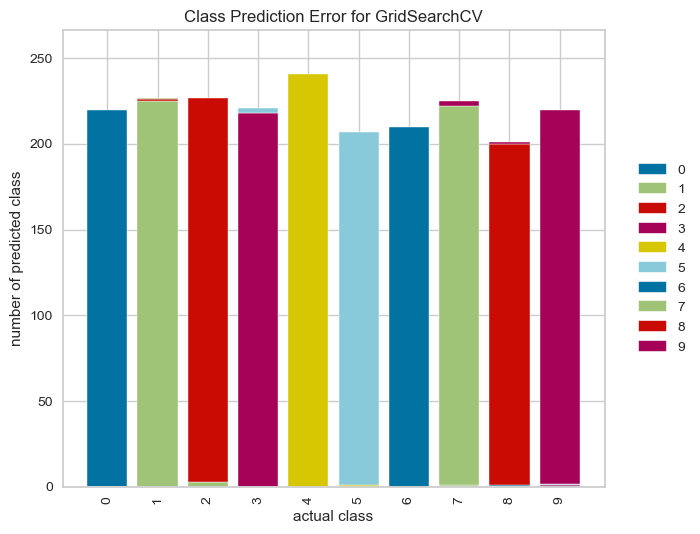

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [38]:
visualizer = ClassPredictionError(SVM_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [39]:
visualizer = ROCAUC(SVM_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

# Decision Tree

In [41]:
DT_model = DecisionTreeClassifier(random_state=101)

DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [42]:
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

In [43]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9472487494315598, 1.0, 0.9472437195988315, 1.0)

In [44]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[220   0   0   0   0   0   1   0   0   0]
 [  0 211  16   1   1   0   0   0   0   0]
 [  0   5 216   0   0   1   0   3   0   0]
 [  0   6   1 207   0   3   0   0   0   2]
 [  0   0   0   0 236   4   0   0   0   2]
 [  0   0   0   7   1 194   0   1   1   6]
 [  4   1   1   0   0   2 198   0   3   1]
 [  0  10   5   2   0   0   3 201   1   0]
 [  7   0   0   0   0   1   0   0 191   0]
 [  0   0   0   2   1   5   0   4   1 209]]
              precision    recall  f1-score   support

           0      0.952     0.995     0.973       221
           1      0.906     0.921     0.913       229
           2      0.904     0.960     0.931       225
           3      0.945     0.945     0.945       219
           4      0.987     0.975     0.981       242
           5      0.924     0.924     0.924       210
           6      0.980     0.943     0.961       210
           7      0.962     0.905     0.933       222
           8      0.970     0.960     0.965       199
           9    

In [45]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()


<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

# Decision Tree GridSerchCV

In [47]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200,220,300,900],
             }

In [48]:
DT_model = DecisionTreeClassifier()
DT_grid_model = GridSearchCV(DT_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [49]:
DT_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180}

In [50]:
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

In [51]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

(0.9281491587085039, 0.964062322301831, 0.9283882612861378, 0.9637641834085727)

In [52]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[211   0   2   0   0   0   1   0   7   0]
 [  0 209  17   2   0   0   0   1   0   0]
 [  0  10 208   4   0   0   0   3   0   0]
 [  1   1   3 210   0   0   1   0   0   3]
 [  0   1   0   1 223   0  12   1   0   4]
 [  0   0   0   3   0 180   2   0   4  21]
 [  2   0   2   0   1   3 201   0   1   0]
 [  0  18   0   5   0   0   1 195   1   2]
 [  0   0   0   0   0   1   0   0 198   0]
 [  0   2   0   1   0  10   0   2   1 206]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[921   0   0   0   1   0   0   0   0   0]
 [  0 854  21  30   0   0   0   9   0   0]
 [  0  14 895   8   0   0   0   2   0   0]
 [  0   5   8 816   0   2   0   0   0   5]
 [  0   1   0   1 877   0  21   0   0   2]
 [  0   0   0   4   1 822   0   0   1  17]
 [  0   0   0   0   1   6 839   0   0   0]
 [  0   9   5  47   0   0   0 854   2   3]
 [  0   0   0   0   0   1   2  11 841   1]
 [  0   8   0   1   3  55   5   0   3 758]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

In [53]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(DT_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
visualizer = ClassPredictionError(DT_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

# Random Forest

In [56]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [57]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [58]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9863574351978172, 1.0, 0.9864386100351126, 1.0)

In [59]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[218   0   0   0   0   0   0   0   3   0]
 [  0 216  12   0   0   0   0   1   0   0]
 [  0   1 222   1   0   0   0   1   0   0]
 [  0   0   0 219   0   0   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   1 219   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   2   1 219]]
              precision    recall  f1-score   support

           0      1.000     0.986     0.993       221
           1      0.991     0.943     0.966       229
           2      0.945     0.987     0.965       225
           3      0.982     1.000     0.991       219
           4      1.000     1.000     1.000       242
           5      1.000     0.976     0.988       210
           6      0.995     1.000     0.998       210
           7      0.982     0.986     0.984       222
           8      0.980     1.000     0.990       199
           9    

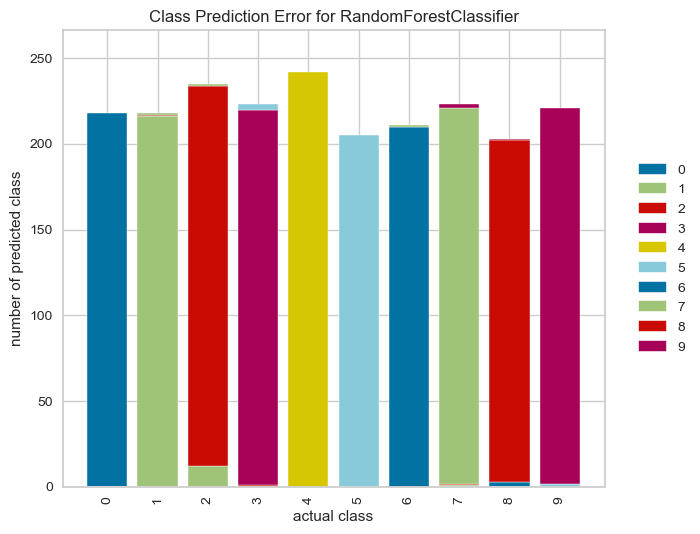

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [60]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## Random Forest GridSearchCV

In [62]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200,220],
             'n_estimators':[50,100],
             }

In [63]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [64]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 100}

In [65]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [66]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9758981355161437, 0.9934038439667917, 0.975976211453677, 0.9934344098927939)

In [67]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[217   0   0   0   0   0   0   0   4   0]
 [  0 214  14   0   0   0   0   1   0   0]
 [  0   1 221   1   0   0   0   2   0   0]
 [  0   1   0 217   0   1   0   0   0   0]
 [  0   0   0   0 241   0   0   0   0   1]
 [  0   0   0   4   0 199   0   0   0   7]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   5   1   2   0   0   0 213   1   0]
 [  1   0   0   0   0   0   0   0 198   0]
 [  0   1   0   2   0   0   0   2   1 216]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[922   0   0   0   0   0   0   0   0   0]
 [  0 882  17  15   0   0   0   0   0   0]
 [  0   1 915   2   0   0   0   1   0   0]
 [  0   3   2 827   0   1   0   2   0   1]
 [  0   1   0   0 900   0   0   0   0   1]
 [  0   0   0   2   0 842   0   0   0   1]
 [  0   0   0   0   1   0 845   0   0   0]
 [  0   0   1   2   0   0   0 917   0   0]
 [  0   0   0   0   0   0   0   0 856   0]
 [  0   1   0   2   1   0   0   0   0 829]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

In [68]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

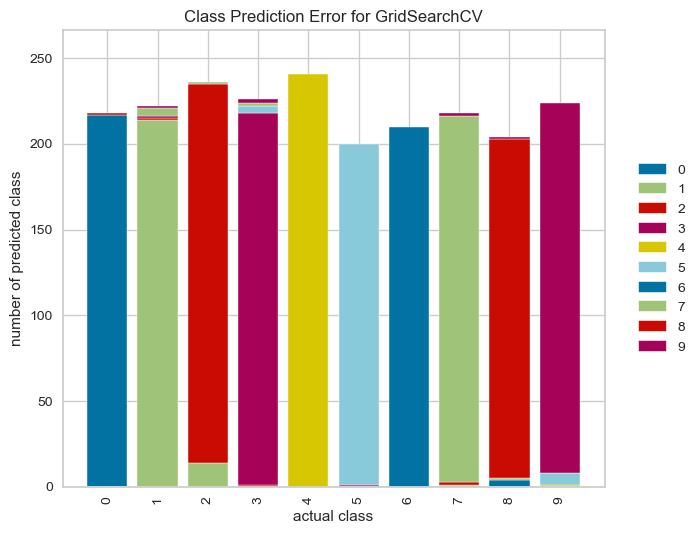

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [69]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# XGBoost

In [95]:
from xgboost import XGBClassifier

In [97]:
XGB_model =  XGBClassifier(random_state=101).fit(X_train, y_train)

In [99]:
y_pred_test = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)

In [101]:
XGB_model_accuracy_test = accuracy_score(y_test, y_pred_test)
XGB_model_accuracy_train = accuracy_score(y_train, y_pred_train)

XGB_model_f1_test = f1_score(y_test, y_pred_test, average='macro')
XGB_model_f1_train = f1_score(y_train, y_pred_train, average='macro')

XGB_model_accuracy_test, XGB_model_accuracy_train, XGB_model_f1_test, XGB_model_f1_train

(0.9854479308776717, 1.0, 0.9852827159620239, 1.0)

In [103]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[214   0   0   0   0   0   0   0   7   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   0 225   0   0   0   0   0   0   0]
 [  0   0   0 219   0   0   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   2   0 204   0   0   0   4]
 [  0   0   1   0   0   1 208   0   0   0]
 [  0   2   1   1   0   0   0 217   1   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   4   0   0   0   2   1 215]]
              precision    recall  f1-score   support

           0      1.000     0.968     0.984       221
           1      0.991     0.978     0.985       229
           2      0.974     1.000     0.987       225
           3      0.969     1.000     0.984       219
           4      1.000     1.000     1.000       242
           5      0.995     0.971     0.983       210
           6      1.000     0.990     0.995       210
           7      0.986     0.977     0.982       222
           8      0.957     1.000     0.978       199
           9    

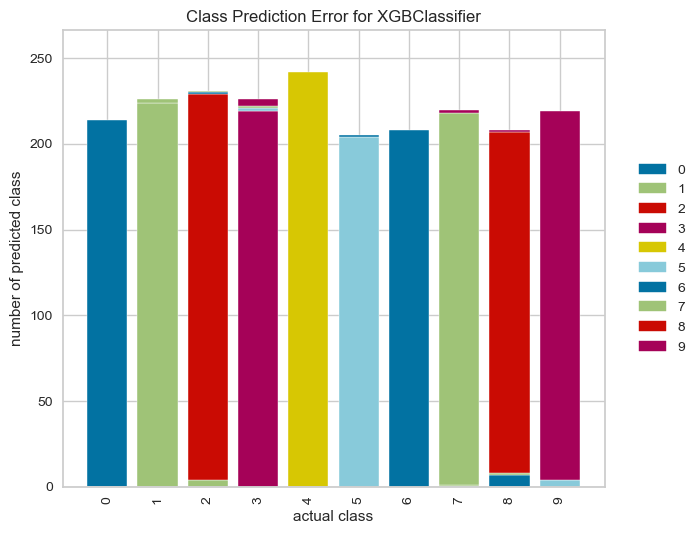

<Axes: title={'center': 'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [120]:
visualizer = ClassPredictionError(XGB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [107]:
param_grid = {
    "XGB_model__n_estimators": [30, 40, 50, 100],
    "XGB_model__max_depth": [1,2, 3],
    "XGB_model__learning_rate": [0.01, 0.05, 0.06],
    "XGB_model__subsample": [0.4,0.5, 0.8],
    "XGB_model__colsample_bytree": [0.4,0.5, 0.8]
}

In [109]:
XGB_model =  XGBClassifier(random_state=101)
XGB_grid_model = GridSearchCV(estimator=XGB_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

In [110]:
XGB_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.4,
 'XGB_model__learning_rate': 0.01,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 30,
 'XGB_model__subsample': 0.4}

In [111]:
y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [113]:
XGB_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
XGB_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

XGB_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
XGB_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

XGB_grid_accuracy_test, XGB_grid_accuracy_train, XGB_grid_f1_test, XGB_grid_f1_train

(0.9854479308776717, 1.0, 0.9852827159620239, 1.0)

In [118]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[214   0   0   0   0   0   0   0   7   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   0 225   0   0   0   0   0   0   0]
 [  0   0   0 219   0   0   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   2   0 204   0   0   0   4]
 [  0   0   1   0   0   1 208   0   0   0]
 [  0   2   1   1   0   0   0 217   1   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   4   0   0   0   2   1 215]]
              precision    recall  f1-score   support

           0      1.000     0.968     0.984       221
           1      0.991     0.978     0.985       229
           2      0.974     1.000     0.987       225
           3      0.969     1.000     0.984       219
           4      1.000     1.000     1.000       242
           5      0.995     0.971     0.983       210
           6      1.000     0.990     0.995       210
           7      0.986     0.977     0.982       222
           8      0.957     1.000     0.978       199
           9    

In [122]:
visualizer = ClassPredictionError(XGB_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

# Feature Importance with XGBoost

In [136]:
XGB_best_model = XGB_grid_model.best_estimator_
XGB_best_model.feature_importances_

array([0.07221683, 0.0865321 , 0.02231961, 0.04451273, 0.0242167 ,
       0.04805699, 0.06327205, 0.02745331, 0.0398537 , 0.09295615,
       0.09689842, 0.02070893, 0.02780311, 0.10497875, 0.054876  ,
       0.1733446 ], dtype=float32)

In [148]:
XGB_best_model = XGB_grid_model.best_estimator_

# Özellik önemlerini DataFrame'e aktarma
imp_feats = pd.DataFrame(
    data=XGB_best_model.feature_importances_,
    columns=['XGB_Importance'],
    index=X_train.columns
)

# Önem sırasına göre sıralama
xgb_imp_feats = imp_feats.sort_values('XGB_Importance', ascending=False)

# İlk 10 önemli özelliği göster
print(xgb_imp_feats.head(10))

# Görselleştirme
xgb_imp_feats.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Feature Importances (XGB)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

         XGB_Importance
input16        0.173345
input14        0.104979
input11        0.096898
input10        0.092956
input2         0.086532
input1         0.072217
input7         0.063272
input15        0.054876
input6         0.048057
input4         0.044513


# Compare The Models

## Accuracy Comparison

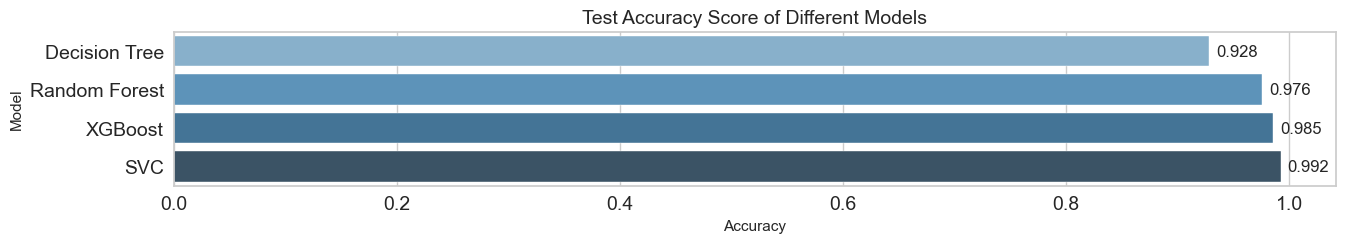

In [151]:
compare = pd.DataFrame({"Model": ["SVC", "Decision Tree", "Random Forest","XGBoost"],
                        "Accuracy": [SVM_accuracy_test, DT_accuracy_test, rfc_accuracy_test,XGB_grid_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

## F1 Score Comparison

In [153]:
compare = pd.DataFrame({"Model": ["SVC", "Decision Tree", "Random Forest","XGBoost"],
                        "F1 Score": [svm_f1_test, DT_f1_test, rfc_f1_test,XGB_grid_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

<p style=" background-color:#c49974;font-family:newtimeroman;font-size:200%;color:#fff5ee;text-align:center;border-radius:20px 20px;"><span  style = "padding : 30px; display : block; "><b>THANK YOU!</b></span></p>